# t-sne 觀察 : 分群
## [教學目標]
觀察雙同心圓使用 t-SNE 在不同困惑度 (perplexity) 下的分群效果 <br />
因為非監督模型的效果, 較難以簡單的範例看出來 <br />
所以非監督偶數日提供的範例與作業, 主要目的在於觀察非監督模型的效果, <br />
同學只要能感受到模型效果即可, 不用執著於搞懂程式的每一個部分 <br />
## [範例重點]
使用同心圓的資料, 觀察 t-sne 在不同困惑度 (perplexity) 下, 分群的效果如何變化<br />

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from sklearn import datasets, manifold
from time import time

In [25]:
n_samples = 300
n_components = 2
perplexities = [4, 6, 9, 14, 21, 30, 45, 66, 100]

x, y = datasets.make_circles(n_samples = n_samples, factor = 0.5, noise = 0.05)
red = (y == 0)
green = (y == 1)

 Circles, preplexity : 4 in 1.0988800525665283 sec
 Circles, preplexity : 6 in 1.1207730770111084 sec
 Circles, preplexity : 9 in 1.044428825378418 sec
 Circles, preplexity : 14 in 1.1062300205230713 sec
 Circles, preplexity : 21 in 1.3316781520843506 sec
 Circles, preplexity : 30 in 1.6431910991668701 sec
 Circles, preplexity : 45 in 1.6363751888275146 sec
 Circles, preplexity : 66 in 1.436056137084961 sec
 Circles, preplexity : 100 in 1.5853941440582275 sec


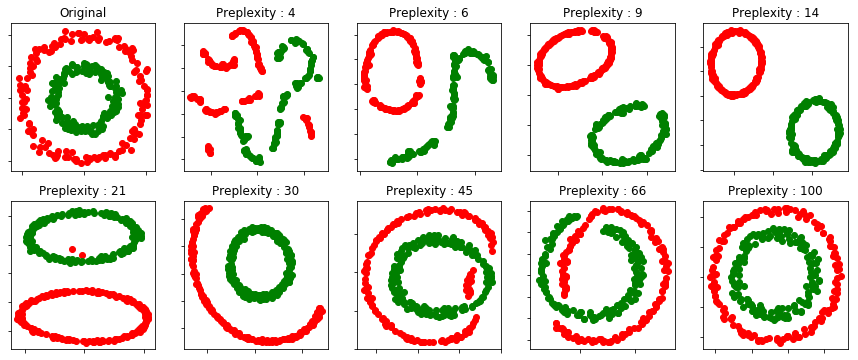

In [26]:
(fig, subplots) = plt.subplots(2,5, figsize = (15,6) )
ax = subplots[0][0]
ax.set_title('Original')
ax.scatter(x[red,0], x[red,1] , c = 'r')
ax.scatter(x[green, 0], x[green, 1], c = 'g')
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

for i, perplexity in enumerate(perplexities):
    if i < 4:
        ax = subplots[0][i+1]
    else :
        ax = subplots[1][i-4]
    
    t0 = time()
    tsne = manifold.TSNE(n_components = n_components, init = 'random', random_state = 0, perplexity = perplexity)
    x_tsne = tsne.fit_transform(x)
    t1 = time()
    
    print(f' Circles, preplexity : {perplexity} in {t1-t0} sec')
    ax.set_title(f'Preplexity : {perplexity}')
    ax.scatter(x_tsne[red, 0], x_tsne[red, 1], c = 'r')
    ax.scatter(x_tsne[green, 0], x_tsne[green, 1], c = 'g')
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
plt.show()
    

# t-sne 觀察 : 流形還原
## [作業目標]
試著模仿範例寫法, 觀察 S 形使用 t-SNE , 在不同困惑度 (perplexity) 下的流形還原效果 <br />
## [作業重點]
使用 S 形資料集, 觀察 t-sne 在困惑度 (perplexity) 有所不同時, 流形還原的效果如何變化 <br />
Hint : ax.scatter(Y[red, 0], Y[red, 1], c="r") 與 ax.scatter(Y[green, 0], Y[green, 1], c="g") 兩行改一行 ax.scatter(Y[:, 0], Y[:, 1], c=color)

In [28]:
x, color = datasets.samples_generator.make_s_curve(n_samples = n_samples, random_state = 0)

In [29]:
print(f' data shape : {x.shape}')
print(f' color shape : {color.shape}')

 data shape : (300, 3)
 color shape : (300,)


Circles, perplexity = 4, 1.1672139167785645 sec
Circles, perplexity = 6, 1.1911981105804443 sec
Circles, perplexity = 9, 1.224090814590454 sec
Circles, perplexity = 14, 1.4995660781860352 sec
Circles, perplexity = 21, 1.3689229488372803 sec
Circles, perplexity = 30, 1.474337100982666 sec
Circles, perplexity = 45, 1.2361950874328613 sec
Circles, perplexity = 66, 1.3882050514221191 sec
Circles, perplexity = 100, 2.5170233249664307 sec


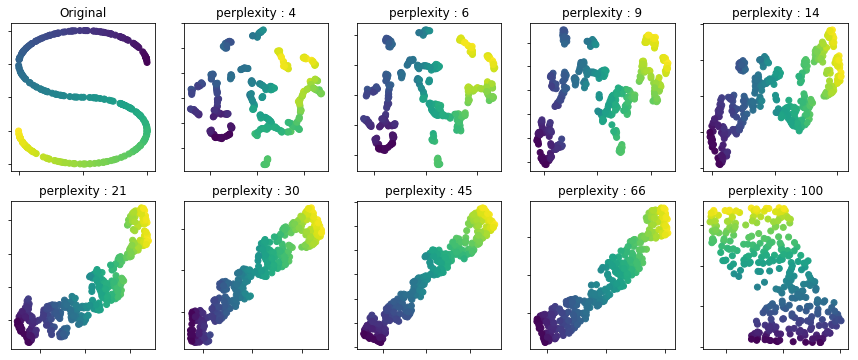

In [36]:
(fig, subplots) = plt.subplots(2, 5, figsize = (15,6))

ax = subplots[0][0]
ax.set_title('Original')
ax.scatter(x[:, 0], x[:,2], c = color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

for i, perplexity in enumerate(perplexities):
    if i < 4 :
        ax = subplots[0][i+1]
    else:
        ax = subplots[1][i-4]
    
    t0 = time()
    tsne = manifold.TSNE(n_components = n_components, init = 'pca', random_state = 0, perplexity = perplexity)
    x_tsne = tsne.fit_transform(x)
    t1 = time()
    print(f'Circles, perplexity = {perplexity}, {t1-t0} sec')
    ax.set_title(f'perplexity : {perplexity}')
    ax.scatter(x_tsne[:,0], x_tsne[:,1], c = color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

plt.show()

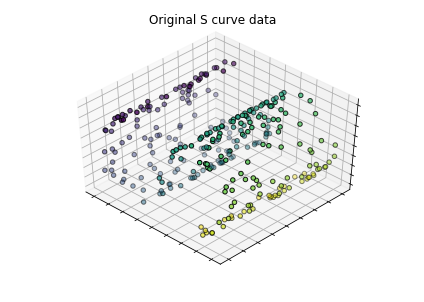

In [47]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (6,4))
ax = Axes3D(fig, rect = [0,0,0.95,1], elev = 48, azim = 134)
ax.scatter(x[:,2], x[:,1], x[:,0], c = color ,edgecolor = 'k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Original S curve data')
ax.dist = 12